In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
#Loading the dataset
shop_data = pd.read_csv("/home/oem/Documents/BBIT/3.2/AI/KNN/pay.csv")

In [3]:
#Checking top 10 records of Dataset..
shop_data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [4]:
shop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
#Data points count value for each class labels..
shop_data.Age.value_counts()

35    32
37    20
26    16
41    16
42    16
39    15
40    15
48    14
47    14
27    13
38    13
28    12
36    12
46    12
31    11
30    11
49    10
29    10
33     9
32     9
24     9
59     7
19     7
45     7
20     7
60     7
34     6
23     6
52     6
25     6
58     6
53     5
57     5
22     5
18     5
21     4
50     4
54     4
55     3
56     3
51     3
43     3
44     2
Name: Age, dtype: int64

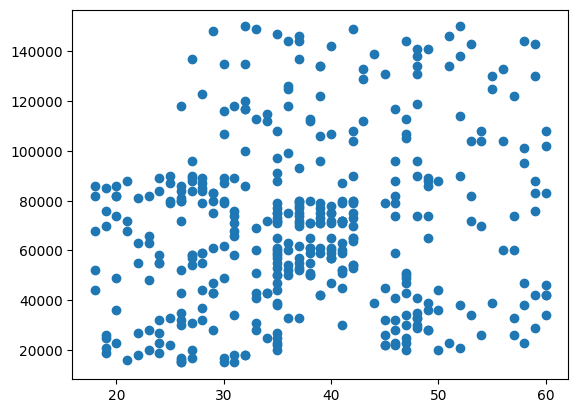

In [6]:
#Visualizing the dataset features to find pattern to solve our task
plt.scatter(shop_data['Age'],shop_data['EstimatedSalary'])
plt.show()

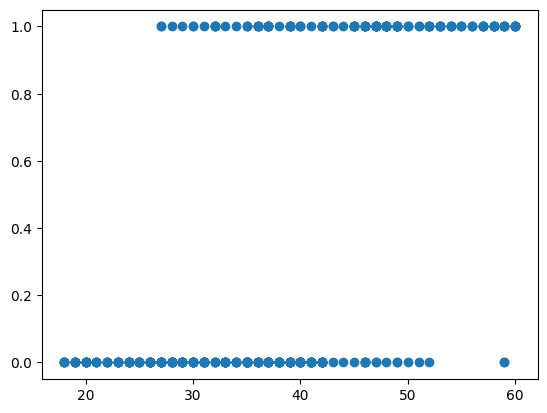

In [7]:
plt.scatter(shop_data['Age'],shop_data['Purchased'])
plt.show()

In [8]:
# Building Classification Model
#Imporing few library for create Decision tree classifier and visualizing the tree structure'''
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [9]:
#separating dependent and independent variables
feature_columns = ['Age', 'Purchased', 'EstimatedSalary']
X = shop_data[feature_columns].values
y = shop_data['Gender'].values

In [10]:
#Data Splitting
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.30, random_state=42)

In [11]:
#spliting data into validation train and validation test
Xt, Xcv, Yt, Ycv = train_test_split(Xtrain, Ytrain, test_size=0.10, random_state=42)

[Text(0.8550104307147673, 0.975, 'X[0] <= 49.5\ngini = 0.5\nsamples = 252\nvalue = [129, 123]'),
 Text(0.7315987440997977, 0.925, 'X[2] <= 107000.0\ngini = 0.5\nsamples = 221\nvalue = [108, 113]'),
 Text(0.6196371375590021, 0.875, 'X[2] <= 86500.0\ngini = 0.498\nsamples = 189\nvalue = [88, 101]'),
 Text(0.47663098449089686, 0.825, 'X[2] <= 81500.0\ngini = 0.5\nsamples = 167\nvalue = [83, 84]'),
 Text(0.2337744436952124, 0.775, 'X[0] <= 28.5\ngini = 0.499\nsamples = 154\nvalue = [73, 81]'),
 Text(0.13553607552258934, 0.725, 'X[0] <= 26.5\ngini = 0.48\nsamples = 35\nvalue = [21, 14]'),
 Text(0.07147673634524612, 0.675, 'X[2] <= 25500.0\ngini = 0.497\nsamples = 28\nvalue = [15, 13]'),
 Text(0.03236682400539447, 0.625, 'X[2] <= 17000.0\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.02157788267026298, 0.575, 'X[0] <= 23.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.01078894133513149, 0.525, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.03236682400539447, 0.525, 'gini = 0

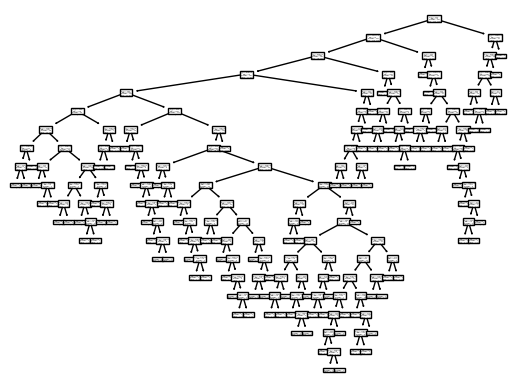

In [12]:
#Creating the decsion tree
Iris_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_clf.fit(Xt, Yt)
#Visualized the Tree which is formed on train dataset
tree.plot_tree(Iris_clf)

In [13]:
#Accuracy
print('Accuracy score is:',cross_val_score(Iris_clf, Xt, Yt, cv=3, scoring='accuracy').mean())

Accuracy score is: 0.507936507936508


In [14]:
#Checking validation test data on our trained model and getting performance metrices
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
Y_hat = Iris_clf.predict(Xcv)

In [15]:
print('Accuracy score for validation test data is:',accuracy_score(Ycv, Y_hat))
multilabel_confusion_matrix(Ycv , Y_hat)

Accuracy score for validation test data is: 0.5


array([[[8, 6],
        [8, 6]],

       [[6, 8],
        [6, 8]]])

In [16]:
YT_hat = Iris_clf.predict(Xtest)
YT_hat

array(['Female', 'Female', 'Female', 'Female', 'Male', 'Male', 'Male',
       'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male',
       'Male', 'Female', 'Female', 'Male', 'Male', 'Male', 'Female',
       'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Male',
       'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male',
       'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Female',
       'Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female',
       'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female',
       'Female', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female',
       'Female', 'Female', 'Male', 'Female', 'Male', 'Male', 'Male',
       'Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female',
       'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female',
       'Ma

In [17]:
print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_hat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_hat)

Model Accuracy Score on totally unseen data(Xtest) is: 46.666666666666664 %


array([[[25, 34],
        [30, 31]],

       [[31, 30],
        [34, 25]]])

In [18]:
# not test actual data of 400 cause its too large

In [19]:
y

array(['Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female',
       'Female', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Female',
       'Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male',
       'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Female',
       'Male', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male',
       'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Female',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Male',
       'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female',
       'Male', 'Male', 'Female', 'Female', 'Female', 'Male', 'Female',
       'Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Female',
       'Female', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female',
       'Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male',
       'Female', 'Female', 'Female', 'Female', 'Male', 'Male', 'Female',
  